In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
data = pd.read_csv(r'iris.csv')
# 删除不需要的ID与Species列（特征），因为现在进行回归预测，类别信息没有用处
data.drop(["id","Species"],axis=1,inplace=True)
# 删除重复的记录
data.drop_duplicates(inplace=True)

In [43]:
class KNN:
    """ 
    使用Python实现K近邻算法（回归预测）
    该算法用语回归也测，根据前三个特征属性，寻找最近的K个邻居，然后再根据k个邻居的第四个特征属性，
    去预测当前样本的第四个特征
    """
    def __init__(self,k):
        """初始化
        Parameters
        -------
        k : int
            邻居的个数
        """
        self.k = k
        
    def fit(self,X,y):
        """
        训练方法
        
        Parameters
        ----------
        X: 特征矩阵 形状为[样本数量，特征数量]
            待训练的样本特征（属性）
        y: 目标标签，形状为[样本数量]
            每个样本的目标值
        """
        # 将X 和 y转换成np.array()形式 方便统一操作
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self,X):
        """
        根据传递的样本，预测结果
        
        Parameters
        ------
        X : 待测试的样本特征  [样本数量，特征数量]
        
        Return
        -----
        result : 数组类型， 预测结果
        """
        # 转换成数组类型
        X = np.asarray(X)
        # 保存预测结果
        result = []
        for x in X:
            # 计算距离（计算训练集中每个X的距离）
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # 返回数组排序后，每个元素在原数组中的索引（排序之前）
            index = dis.argsort()
            # 取前K个距离最近的索引
            index = index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)
    
    def predict2weight(self,X):
        """
        根据传递的样本，预测结果(考虑权重)
        
        Parameters
        ------
        X : 待测试的样本特征  [样本数量，特征数量]
        
        Return
        -----
        result : 数组类型， 预测结果
        """
        # 转换成数组类型
        X = np.asarray(X)
        # 保存预测结果
        result = []
        for x in X:
            # 计算距离（计算训练集中每个X的距离）
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # 返回数组排序后，每个元素在原数组中的索引（排序之前）
            index = dis.argsort()
            # 取前K个距离最近的索引
            index = index[:self.k]
            # 求所有邻居节点距离的倒数之和【避免除数为0，最后加一个很小的值】
            s = np.sum(1/(dis[index] + 0.001))
            # 使用每个节点距离的倒数，除以倒数之和，得到权重
            weight = (1/(dis[index] + 0.001))/s
            display(len(index))
            display(s)
            display(weight)
            # 使用邻居节点的标签值，乘以对应的权重，然后相加，得到最终的预测结果
            result.append( np.sum(self.y[index] * weight))
           # result.append(np.mean(self.y[index]))
        return np.array(result)
        

In [44]:
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:120,:-1]
train_y = t.iloc[:120,-1]
test_X = t.iloc[120: ,:-1]
test_y = t.iloc[120:,-1]
knn = KNN(k=3)
knn.fit(train_X,train_y)

result = knn.predict2weight(test_X)
display(result)
display(test_y.values)

3

17.21400458622891

array([0.40788992, 0.33347038, 0.2586397 ])

3

13.209985428402302

array([0.53152359, 0.26669809, 0.20177832])

3

15.925868881808753

array([0.44088137, 0.27955932, 0.27955932])

3

6.900580041048608

array([0.40081123, 0.31554266, 0.28364612])

3

17.214004586228864

array([0.40788992, 0.33347038, 0.2586397 ])

3

13.550546691629417

array([0.51816499, 0.25999526, 0.22183975])

3

5.703030978686751

array([0.34999073, 0.32500463, 0.32500463])

3

11.127612127166831

array([0.40010606, 0.31660682, 0.28328712])

3

6.7282909675832885

array([0.35959921, 0.34949144, 0.29090935])

3

12.97033400170448

array([0.34326217, 0.34326217, 0.31347566])

3

11.449692697582282

array([0.43452034, 0.29016142, 0.27531823])

3

17.882164341532153

array([0.55367963, 0.27821713, 0.16810325])

3

10.911221083325003

array([0.37263327, 0.32288576, 0.30448097])

3

14.64481070291886

array([0.39197234, 0.30401383, 0.30401383])

3

17.1191832849755

array([0.57835645, 0.23750455, 0.18413899])

3

12.415747831586978

array([0.46234514, 0.28375882, 0.25389604])

3

9.746092619992744

array([0.51047374, 0.24825212, 0.24127414])

3

23.94382786462917

array([0.41350907, 0.29324546, 0.29324546])

3

15.53952788501454

array([0.45184248, 0.28650967, 0.26164785])

3

15.91408876998949

array([0.44120772, 0.36070936, 0.19808292])

3

10.652926135343657

array([0.41793447, 0.31186353, 0.270202  ])

3

9.435434952060138

array([0.60838326, 0.20744383, 0.18417291])

3

10.394193003330736

array([0.3911688 , 0.31962646, 0.28920474])

3

22.662769685739285

array([0.4368835 , 0.30982175, 0.25329476])

3

1014.0428377656192

array([0.98615163, 0.00692418, 0.00692418])

3

18.10872176832453

array([0.38773686, 0.38773686, 0.22452628])

3

15.53952788501453

array([0.45184248, 0.28650967, 0.26164785])

3

5.234042360273112

array([0.52843094, 0.23668337, 0.23488568])

3

19.01796214372867

array([0.36919933, 0.36919933, 0.26160134])

array([0.2       , 2.06034623, 0.2       , 1.92517496, 1.27413603,
       1.19618445, 1.23000185, 2.04006363, 1.12909093, 1.93134757,
       2.02753182, 1.85536796, 1.81368336, 0.2       , 1.1368278 ,
       2.23590685, 1.59999864, 0.28797364, 1.47134903, 1.25587923,
       1.6919192 , 1.39627809, 0.27823376, 0.24368835, 0.2       ,
       2.0714158 , 1.25481575, 2.14183025, 0.22616013])

array([0.2, 1.6, 0.2, 2.3, 1.3, 1.2, 1.3, 1.8, 1. , 2.3, 2.3, 1.5, 1.7,
       0.2, 1. , 2.1, 2.3, 0.2, 1.3, 1.3, 1.8, 1.3, 0.2, 0.4, 0.1, 1.8,
       1. , 2.2, 0.2])

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

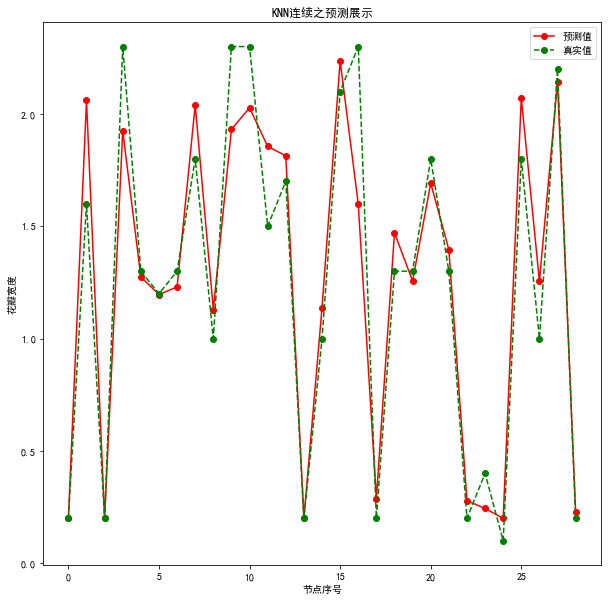

In [38]:
plt.figure(figsize=(10,10))
# 绘制预测值
plt.plot(result,'ro-',label="预测值")
# 绘制真实值
plt.plot(test_y.values,"go--", label="真实值")
plt.title("KNN连续之预测展示")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
plt.legend()
plt.show()